# Data Diri
- Nama :   Reo Sahobby
- Asal :   Klaten, Jawa Tengah
- Email :  reoshby@gmail.com

## Import Library yang digunakan

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.callbacks import Callback, EarlyStopping, TensorBoard, ModelCheckpoint

from google.colab import files
import zipfile,os

import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [2]:
# Download Datasets
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-10-12 03:04:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.69MB/s    in 47s     

2020-10-12 03:04:57 (6.52 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



## Ekstraksi File ZIP

In [3]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

base_dir = ('/content/rockpaperscissors/rps-cv-images')
os.listdir(base_dir)

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock']

## Buat DataGenerator dan pecah data

In [10]:
# Buat datagen untuk augmentasi data gambar
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range= 0.2,
    fill_mode = 'wrap',
    validation_split=0.4
    )

In [11]:
# Buat generator untuk train
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
    )
 
 # Buat generator untuk validation
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Buat Arsitektur CNN dan Neural Network

In [12]:
model = Sequential([
                    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                    MaxPooling2D(2, 2),
                    Conv2D(128, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(256, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(1024, activation='relu'),
                    Dropout(rate=0.2),
                    Dense(512, activation='relu'),
                    Dropout(rate=0.2),
                    Dense(3, activation='softmax')
])

## Buat optimizer dan loss nya

In [13]:
opt = Adam(learning_rate=0.002) # Set optimizer dan learning rate
model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']) 

## Buat Callback dan proses training

In [15]:
# buat variabel untuk menampung early stopping pada callback
cb = EarlyStopping(monitor='val_accuracy', min_delta=1e-3, patience=10, verbose=2, restore_best_weights=True)

# Proses training
model.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose = 2,
    callbacks = cb
)

Epoch 1/100
21/21 - 16s - loss: 0.5660 - accuracy: 0.7763 - val_loss: 0.3871 - val_accuracy: 0.8513
Epoch 2/100
21/21 - 15s - loss: 0.3827 - accuracy: 0.8486 - val_loss: 0.4338 - val_accuracy: 0.8387
Epoch 3/100
21/21 - 15s - loss: 0.3102 - accuracy: 0.8752 - val_loss: 0.3539 - val_accuracy: 0.8959
Epoch 4/100
21/21 - 15s - loss: 0.3116 - accuracy: 0.8988 - val_loss: 0.3058 - val_accuracy: 0.9096
Epoch 5/100
21/21 - 15s - loss: 0.2486 - accuracy: 0.9087 - val_loss: 0.2241 - val_accuracy: 0.9245
Epoch 6/100
21/21 - 15s - loss: 0.2001 - accuracy: 0.9285 - val_loss: 0.1970 - val_accuracy: 0.9256
Epoch 7/100
21/21 - 15s - loss: 0.1765 - accuracy: 0.9361 - val_loss: 0.2089 - val_accuracy: 0.9314
Epoch 8/100
21/21 - 15s - loss: 0.1748 - accuracy: 0.9460 - val_loss: 0.1886 - val_accuracy: 0.9428
Epoch 9/100
21/21 - 15s - loss: 0.1430 - accuracy: 0.9521 - val_loss: 0.1885 - val_accuracy: 0.9302
Epoch 10/100
21/21 - 15s - loss: 0.1437 - accuracy: 0.9536 - val_loss: 0.1537 - val_accuracy: 0.9474

Saving 1e1VCnCEApnFh9Oo.png to 1e1VCnCEApnFh9Oo.png
1e1VCnCEApnFh9Oo.png
[[0. 1. 0.]]
Prediksi: Rock


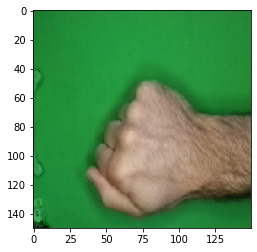

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  
  print(fn)
  print(classes)
  if classes[0][0] == 1:
    print("Prediksi: Paper")
  elif classes[0][1] == 1:
    print("Prediksi: Rock")
  elif classes[0][2] == 1:
    print("Prediksi: Scissors")
  else:
    print("Tidak dapat diprediksi")

# Data Diri
- Nama :   Reo Sahobby
- Asal :   Klaten, Jawa Tengah
- Email :  reoshby@gmail.com
<br>
Waktu yang dibutuhkan dalam proses training tersebut adalah 10 menit, dengan akruasi 97,72% untuk data train, dan 96,45% untuk data validation.